<a href="https://colab.research.google.com/github/kstyle2198/hr/blob/main/jupyter/ARIMA_pred_test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pickle
import pmdarima as pm
import statsmodels.api as sm
import statsmodels.tsa.api as smt


In [7]:
with open("sample_data/pickle_df2.pickle", 'rb') as filename:
    pension_df = pickle.load(filename)

In [8]:
def acf_chart(x):
    pm.acf(x)
    pm.plot_acf(x)

In [9]:
df = pension_df

In [10]:
df = df[df["약식명"]=="모트롤"]

In [11]:
df['period'] = pd.to_datetime(df["기준일자"])
df = df.rename(columns={"신규취득": "num"})
df.head()

<ipython-input-11-3c40981e5bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = pd.to_datetime(df["기준일자"])


,약식명,기준일자,직원수,num,자격상실,당월고지금액,평균소득월액,period
174,모트롤,2021-01,501,3,6,220196900,4883497,2021-01-01
175,모트롤,2021-02,516,21,2,224872400,4842213,2021-02-01
176,모트롤,2021-03,514,0,5,223967000,4841482,2021-03-01
177,모트롤,2021-04,511,2,2,222994920,4848769,2021-04-01
178,모트롤,2021-05,513,4,7,223622220,4843452,2021-05-01


In [12]:
df = df[["period", "num"]]
df = df.set_index('period')

In [13]:
df.head(2)

,num
period,
2021-01-01,3
2021-02-01,21


In [14]:
df.isnull().sum()

num    0
dtype: int64

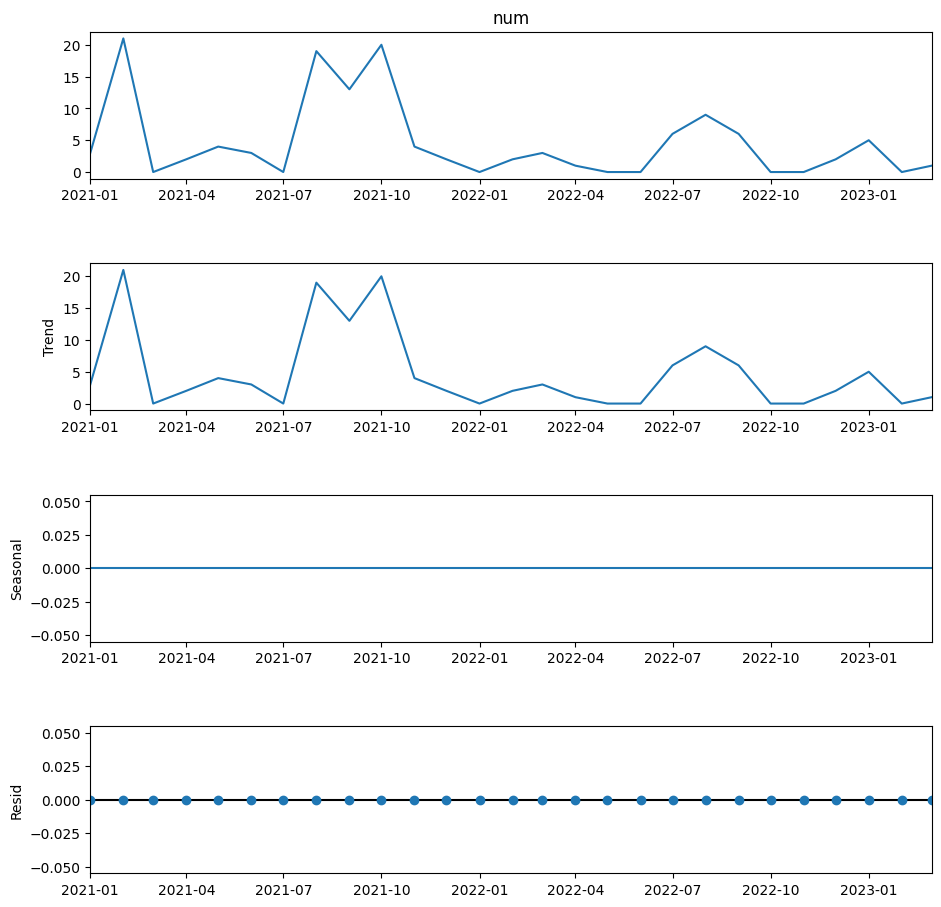

In [15]:
decomposition = sm.tsa.seasonal_decompose(df['num'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


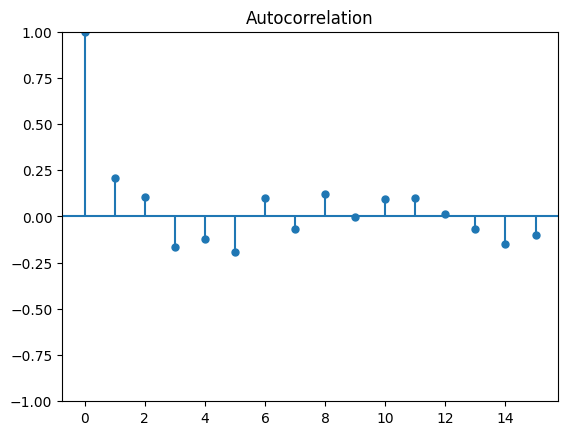

In [16]:
acf_chart(df['num'])

In [17]:
def tsplot(y, lags=12, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


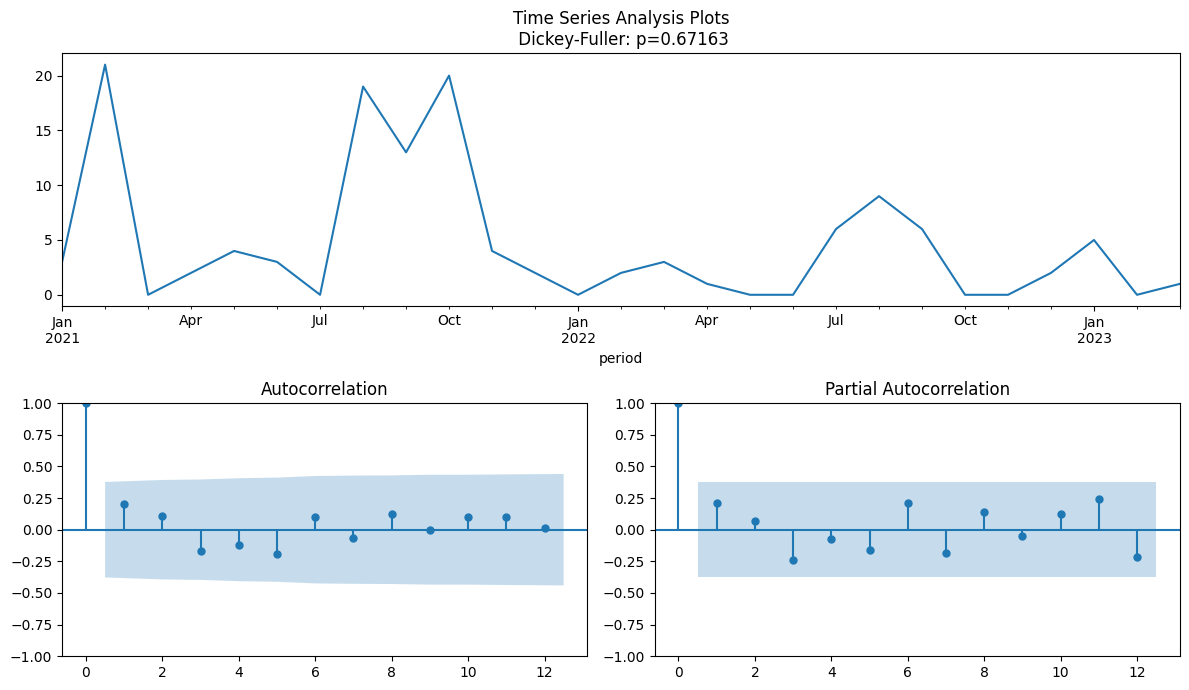

In [18]:
tsplot(df['num'])

In [19]:
adfuller(df['num'])

(-1.2045584571817556,
 0.6716317110632097,
 5,
 21,
 {'1%': -3.7883858816542486,
  '5%': -3.013097747543462,
  '10%': -2.6463967573696143},
 76.93012586449962)

In [20]:
y1_diff = df.diff().dropna()['num']   #diff의 디폴트 차분차수는 1이고.. 차분시 발생하는 짝이 없어서 발생하는 nan 데이터는 드랍한다.
y1_diff

period
2021-02-01    18.0
2021-03-01   -21.0
2021-04-01     2.0
2021-05-01     2.0
2021-06-01    -1.0
2021-07-01    -3.0
2021-08-01    19.0
2021-09-01    -6.0
2021-10-01     7.0
2021-11-01   -16.0
2021-12-01    -2.0
2022-01-01    -2.0
2022-02-01     2.0
2022-03-01     1.0
2022-04-01    -2.0
2022-05-01    -1.0
2022-06-01     0.0
2022-07-01     6.0
2022-08-01     3.0
2022-09-01    -3.0
2022-10-01    -6.0
2022-11-01     0.0
2022-12-01     2.0
2023-01-01     3.0
2023-02-01    -5.0
2023-03-01     1.0
Name: num, dtype: float64

In [21]:
adfuller(y1_diff)

(-3.8798318368886244,
 0.0021883904986577355,
 2,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 82.63216402743684)

In [22]:
# tsplot(y1_diff)

Augmented Dickey-Fuller Test
- adf : 검정통계량
- p value : 통상 p value가 0.05 보다 작아야 데이터가 stationary(움직이지 않는) 하다고 볼 수 있다.
- usedlag: 사용된 시차의 수
- nobs: 분석에 사용된 자료의 수
- critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값

In [23]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(df['num'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
# To print the summary
summary = stepwise_fit.summary()
summary

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=108.306, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=107.750, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=105.791, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=107.750, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=109.750, Time=0.20 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=107.753, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=107.692, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.283 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   27
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -50.896
Date:                            Thu, 11 May 2023   AIC                            105.791
Time:                                    09:11:48   BIC                            107.069
Sample:                                01-01-2021   HQIC                           105.673
                                     - 03-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5457      0.216     -2.530      0.011      -0.968      -0.123
sigma2        82.0758     62.610      1.311      0.190     -40.638     204.789
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.97   Prob(JB):                         0.53
Heteroskedasticity (H):               0.73   Skew:                             0.01
Prob(H) (two-sided):                  0.74   Kurtosis:                         1.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
get_parametes = stepwise_fit.get_params()
get_parametes

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [26]:
order = get_parametes["order"]
seasonal_order = get_parametes["seasonal_order"]
order, seasonal_order

((1, 1, 0), (0, 1, 0, 12))

In [27]:
train = df.iloc[:24]
test = df.iloc[24:]

In [28]:
# train, test

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['num'], 
                order = order, 
                seasonal_order = seasonal_order)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                num   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -40.932
Date:                            Thu, 11 May 2023   AIC                             85.864
Time:                                    09:11:58   BIC                             86.660
Sample:                                01-01-2021   HQIC                            85.363
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5605      0.251     -2.233      0.026      -1.053      -0.068
sigma2        96.5464     99.799      0.967      0.333     -99.056     292.149
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.80   Prob(JB):                         0.54
Heteroskedasticity (H):               0.92   Skew:                            -0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         1.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='period'>

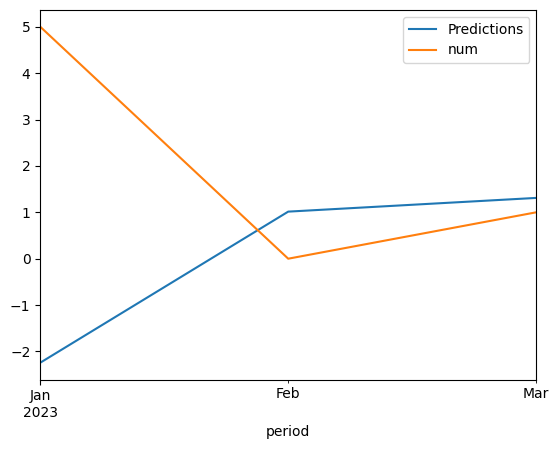

In [30]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
# plot predictions and actual values
predictions.plot(legend = True)
test['num'].plot(legend = True)

In [31]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
rmse(test["num"], predictions)
# Calculate mean squared error
mean_squared_error(test["num"], predictions)

17.857816604643165

<Axes: xlabel='period'>

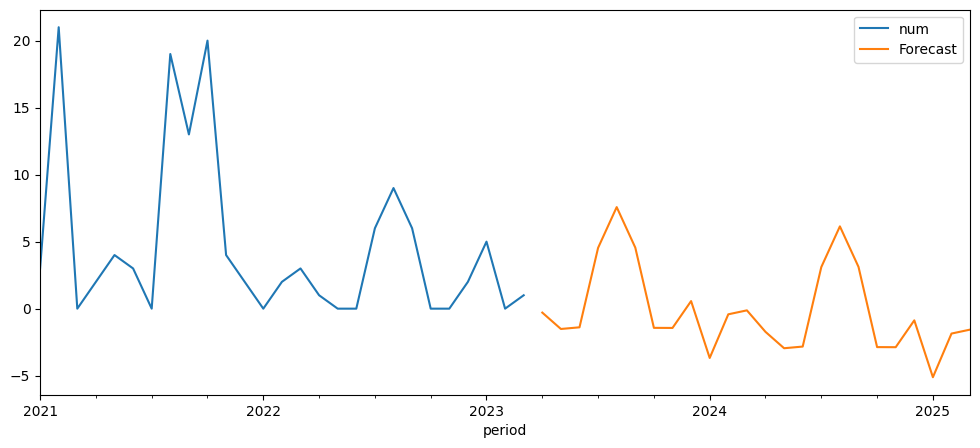

In [32]:
# Train the model on the full dataset
# model = SARIMAX(df['num'], order = order, seasonal_order =seasonal_order)
# result = model.fit()
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 2 * 12, 
                          typ = 'levels').rename('Forecast')
# Plot the forecast values
df['num'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [33]:
df['num']

period
2021-01-01     3
2021-02-01    21
2021-03-01     0
2021-04-01     2
2021-05-01     4
2021-06-01     3
2021-07-01     0
2021-08-01    19
2021-09-01    13
2021-10-01    20
2021-11-01     4
2021-12-01     2
2022-01-01     0
2022-02-01     2
2022-03-01     3
2022-04-01     1
2022-05-01     0
2022-06-01     0
2022-07-01     6
2022-08-01     9
2022-09-01     6
2022-10-01     0
2022-11-01     0
2022-12-01     2
2023-01-01     5
2023-02-01     0
2023-03-01     1
Name: num, dtype: int64

In [34]:
forecast.round()

2023-04-01   -0.0
2023-05-01   -2.0
2023-06-01   -1.0
2023-07-01    5.0
2023-08-01    8.0
2023-09-01    5.0
2023-10-01   -1.0
2023-11-01   -1.0
2023-12-01    1.0
2024-01-01   -4.0
2024-02-01   -0.0
2024-03-01   -0.0
2024-04-01   -2.0
2024-05-01   -3.0
2024-06-01   -3.0
2024-07-01    3.0
2024-08-01    6.0
2024-09-01    3.0
2024-10-01   -3.0
2024-11-01   -3.0
2024-12-01   -1.0
2025-01-01   -5.0
2025-02-01   -2.0
2025-03-01   -2.0
Freq: MS, Name: Forecast, dtype: float64